### 두개의 데이터 셋을 합치고 처리하기

### 데이터 참고 사이트 
* our world in data
  * https://ourworldindata.org/covid-vaccinations
* bloomberg.com
  * https://www.bloomberg.com/graphics/covid-vaccine-tracker-global-distribution/
  
* 코로나 19(COVID-19) 실시간 상황판
  * https://coronaboard.kr/

In [1]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')

### 01 파일 불러오기

In [6]:
os.listdir()

['.git',
 '.idea',
 '.ipynb_checkpoints',
 '01_dataScraping_corona01_today.ipynb',
 '01_dataScraping_corona02.ipynb',
 '01_dataScraping_corona02.py',
 '02_dataScraping_bloomberg.ipynb',
 '02_dataScraping_bloomberg.py',
 '03_corona_vaccine_merge.ipynb',
 '03_corona_vaccine_merge.py',
 '04_analysis_corr.ipynb',
 '05_people_request.ipynb',
 '06_corona_analysis.ipynb',
 '20210921_00_datamerge.csv',
 '20210921_00_datamerge.xlsx',
 '2021_0911_13',
 '2021_0911_13.zip',
 '2021_0920_00',
 'chromedriver_91.exe',
 'data',
 'html_pdf',
 'project01_01',
 'README.md',
 'WEB_sel_project11_naverNews_corona_0731.ipynb']

In [9]:
path = os.getcwd() + '\\data'

In [10]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\toto\Documents\Github\corona_analysis\data\2021-08-07_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-08-07_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-19_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-19_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-20_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-20_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-28_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-28_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\20210808_16datamerge.csv
C:\Users\toto\Documents\Github\corona_analysis\data\20210808_16datamerge.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\20210808_16_today_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\20210808_16_today_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\20210808_16_vaccine_bloomberg.csv


In [11]:
import pandas as pd

# excel 데이터 셋도 pd.read_excel로 가져올 수 있음.
corona = pd.read_csv("./data/2021-09-28_corona.csv")
vaccine = pd.read_csv("./data/20210929_00_vaccine_bloomberg.csv")
country_code = pd.read_excel("./data/country.xlsx")

corona.shape, vaccine.shape, country_code.shape

((222, 12), (207, 6), (227, 4))

In [12]:
corona.head()

,국가,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,21819\n-275,1.6,76.0,132772,331002651,43942335,187382.0,709119,2781.0,33394833.0,208564.0
1,인도🇮🇳,8944,1.3,97.8,24431,1380004385,33714241,21093.0,447699,337.0,32976760.0,28144.0
2,브라질🇧🇷,8318,2.8,95.3,100520,212559417,21366395,14423.0,594702,218.0,20361191.0,20818.0
3,영국🇬🇧,878\n-38,1.8,80.7,113959,67886011,7701715,37485.0,136208,40.0,6219111.0,33541.0
4,러시아🇷🇺,2300,2.8,88.9,51151,145934462,7464708,21559.0,205531,852.0,6635485.0,17368.0


In [13]:
vaccine.head()

,국가,백신접종수,Enough_for_percent_of_people:,1차접종,2차접종,일별접종수
0,Global Total,6.172363e+09,-999.0,-999.0,-999.0,31740868.0
1,Mainland China,2.200202e+09,78.6,78.6,73.0,3223429.0
2,India,8.705669e+08,31.8,46.2,16.4,7488509.0
3,EU,5.629421e+08,63.4,67.2,64.6,999304.0
4,U.S.,3.901143e+08,60.9,64.3,55.3,716762.0


In [14]:
country_code.head()

,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


### 코로나에 나라명이 있으면 해당되는 열을 붙여라

In [15]:
corona['국가'].str.extract('([ㄱ-ㅣ가-힣]+)')

,0
0,미국
1,인도
2,브라질
3,영국
4,러시아
...,...
217,마셜
218,바누아투
219,사모아
220,세인트헬레나


In [19]:
corona['한글표기'] = corona['국가'].str.extract('([ㄱ-ㅣ가-힣]+)', expand=False)
corona.columns


Index(['국가', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', 'hangul_code', '한글표기'],
      dtype='object')

In [20]:
col = ['국가', '한글표기', '위중증', '치명(%)', '완치(%)', '발생률', 
       '인구수', '확진자_합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일']

new_corona = corona[col].copy()
new_corona

,국가,한글표기,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,미국,21819\n-275,1.6,76.0,132772,331002651,43942335,187382.0,709119,2781.0,33394833.0,208564.0
1,인도🇮🇳,인도,8944,1.3,97.8,24431,1380004385,33714241,21093.0,447699,337.0,32976760.0,28144.0
2,브라질🇧🇷,브라질,8318,2.8,95.3,100520,212559417,21366395,14423.0,594702,218.0,20361191.0,20818.0
3,영국🇬🇧,영국,878\n-38,1.8,80.7,113959,67886011,7701715,37485.0,136208,40.0,6219111.0,33541.0
4,러시아🇷🇺,러시아,2300,2.8,88.9,51151,145934462,7464708,21559.0,205531,852.0,6635485.0,17368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,마셜 제도🇲🇭,마셜,NaN,-,100.0,68,59190,4,NaN,0,NaN,4.0,NaN
218,바누아투🇻🇺,바누아투,NaN,25,75.0,13,307145,4,NaN,1,NaN,3.0,NaN
219,사모아🇼🇸,사모아,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN
220,세인트헬레나🇸🇭,세인트헬레나,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN


### 두 데이터 셋 연결

In [21]:
new_corona.head()

,국가,한글표기,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,미국,21819\n-275,1.6,76.0,132772,331002651,43942335,187382.0,709119,2781.0,33394833.0,208564.0
1,인도🇮🇳,인도,8944,1.3,97.8,24431,1380004385,33714241,21093.0,447699,337.0,32976760.0,28144.0
2,브라질🇧🇷,브라질,8318,2.8,95.3,100520,212559417,21366395,14423.0,594702,218.0,20361191.0,20818.0
3,영국🇬🇧,영국,878\n-38,1.8,80.7,113959,67886011,7701715,37485.0,136208,40.0,6219111.0,33541.0
4,러시아🇷🇺,러시아,2300,2.8,88.9,51151,145934462,7464708,21559.0,205531,852.0,6635485.0,17368.0


In [22]:
country_code.head()

,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


In [23]:
country_code.columns = ['han_code', 'eng_code', 'country', 'etc']
country_code.head()

,han_code,eng_code,country,etc
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


In [24]:
df_corona = new_corona.merge(country_code, left_on='한글표기', 
                             right_on='han_code')

df_corona.head()

,국가,한글표기,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,han_code,eng_code,country,etc
0,미국🇺🇸,미국,21819\n-275,1.6,76.0,132772,331002651,43942335,187382.0,709119,2781.0,33394833.0,208564.0,미국,U.S.,NaN,NaN
1,인도🇮🇳,인도,8944,1.3,97.8,24431,1380004385,33714241,21093.0,447699,337.0,32976760.0,28144.0,인도,India,NaN,NaN
2,브라질🇧🇷,브라질,8318,2.8,95.3,100520,212559417,21366395,14423.0,594702,218.0,20361191.0,20818.0,브라질,Brazil,NaN,NaN
3,영국🇬🇧,영국,878\n-38,1.8,80.7,113959,67886011,7701715,37485.0,136208,40.0,6219111.0,33541.0,영국,U.K.,NaN,NaN
4,러시아🇷🇺,러시아,2300,2.8,88.9,51151,145934462,7464708,21559.0,205531,852.0,6635485.0,17368.0,러시아,Russia,NaN,NaN


In [25]:
df_corona.drop(['국가', 'han_code', 'country', 'etc'], axis=1, inplace=True)
df_corona.head()

,한글표기,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,eng_code
0,미국,21819\n-275,1.6,76.0,132772,331002651,43942335,187382.0,709119,2781.0,33394833.0,208564.0,U.S.
1,인도,8944,1.3,97.8,24431,1380004385,33714241,21093.0,447699,337.0,32976760.0,28144.0,India
2,브라질,8318,2.8,95.3,100520,212559417,21366395,14423.0,594702,218.0,20361191.0,20818.0,Brazil
3,영국,878\n-38,1.8,80.7,113959,67886011,7701715,37485.0,136208,40.0,6219111.0,33541.0,U.K.
4,러시아,2300,2.8,88.9,51151,145934462,7464708,21559.0,205531,852.0,6635485.0,17368.0,Russia


In [26]:
vaccine.head()

,국가,백신접종수,Enough_for_percent_of_people:,1차접종,2차접종,일별접종수
0,Global Total,6.172363e+09,-999.0,-999.0,-999.0,31740868.0
1,Mainland China,2.200202e+09,78.6,78.6,73.0,3223429.0
2,India,8.705669e+08,31.8,46.2,16.4,7488509.0
3,EU,5.629421e+08,63.4,67.2,64.6,999304.0
4,U.S.,3.901143e+08,60.9,64.3,55.3,716762.0


In [27]:
df_corona_all = df_corona.merge(vaccine, left_on='eng_code', right_on='국가')
df_corona_all.head()

,한글표기,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,eng_code,국가,백신접종수,Enough_for_percent_of_people:,1차접종,2차접종,일별접종수
0,미국,21819\n-275,1.6,76.0,132772,331002651,43942335,187382.0,709119,2781.0,33394833.0,208564.0,U.S.,U.S.,390114340.0,60.9,64.3,55.3,716762.0
1,인도,8944,1.3,97.8,24431,1380004385,33714241,21093.0,447699,337.0,32976760.0,28144.0,India,India,870566900.0,31.8,46.2,16.4,7488509.0
2,브라질,8318,2.8,95.3,100520,212559417,21366395,14423.0,594702,218.0,20361191.0,20818.0,Brazil,Brazil,232250880.0,56.3,71.1,41.4,3757702.0
3,영국,878\n-38,1.8,80.7,113959,67886011,7701715,37485.0,136208,40.0,6219111.0,33541.0,U.K.,U.K.,93500856.0,70.0,73.0,67.0,63103.0
4,러시아,2300,2.8,88.9,51151,145934462,7464708,21559.0,205531,852.0,6635485.0,17368.0,Russia,Russia,89682024.0,30.6,32.4,28.4,220487.0


In [28]:
df_corona_all.drop(['국가'], axis=1, inplace=True)
df_corona_all

,한글표기,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,eng_code,백신접종수,Enough_for_percent_of_people:,1차접종,2차접종,일별접종수
0,미국,21819\n-275,1.6,76.0,132772,331002651,43942335,187382.0,709119,2781.0,33394833.0,208564.0,U.S.,390114340.0,60.9,64.3,55.3,716762.0
1,인도,8944,1.3,97.8,24431,1380004385,33714241,21093.0,447699,337.0,32976760.0,28144.0,India,870566900.0,31.8,46.2,16.4,7488509.0
2,브라질,8318,2.8,95.3,100520,212559417,21366395,14423.0,594702,218.0,20361191.0,20818.0,Brazil,232250880.0,56.3,71.1,41.4,3757702.0
3,영국,878\n-38,1.8,80.7,113959,67886011,7701715,37485.0,136208,40.0,6219111.0,33541.0,U.K.,93500856.0,70.0,73.0,67.0,63103.0
4,러시아,2300,2.8,88.9,51151,145934462,7464708,21559.0,205531,852.0,6635485.0,17368.0,Russia,89682024.0,30.6,32.4,28.4,220487.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,NaN,-,90.0,108,649335,70,3.0,0,NaN,63.0,NaN,Macau,649564.0,47.8,51.2,44.6,4123.0
174,몬트세랫,NaN,3.0,90.9,6611,4992,33,NaN,1,NaN,30.0,NaN,Montserrat,2871.0,28.7,29.7,27.8,2.0
175,사모아,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,Samoa,149431.0,37.2,49.3,25.0,981.0
176,세인트헬레나,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,St. Helena,7892.0,65.8,72.7,58.9,8.0


In [29]:
df_corona_all.columns

Index(['한글표기', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', 'eng_code', '백신접종수',
       'Enough_for_percent_of_people:', '1차접종', '2차접종', '일별접종수'],
      dtype='object')

In [31]:
sel = ['한글표기', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종수',
       'Enough_for_percent_of_people:', '1차접종', '2차접종',  '일별접종수' ]
df_corona_all_n = df_corona_all[sel].copy()
df_corona_all_n

,한글표기,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,Enough_for_percent_of_people:,1차접종,2차접종,일별접종수
0,미국,U.S.,21819\n-275,1.6,76.0,132772,331002651,43942335,187382.0,709119,2781.0,33394833.0,208564.0,390114340.0,60.9,64.3,55.3,716762.0
1,인도,India,8944,1.3,97.8,24431,1380004385,33714241,21093.0,447699,337.0,32976760.0,28144.0,870566900.0,31.8,46.2,16.4,7488509.0
2,브라질,Brazil,8318,2.8,95.3,100520,212559417,21366395,14423.0,594702,218.0,20361191.0,20818.0,232250880.0,56.3,71.1,41.4,3757702.0
3,영국,U.K.,878\n-38,1.8,80.7,113959,67886011,7701715,37485.0,136208,40.0,6219111.0,33541.0,93500856.0,70.0,73.0,67.0,63103.0
4,러시아,Russia,2300,2.8,88.9,51151,145934462,7464708,21559.0,205531,852.0,6635485.0,17368.0,89682024.0,30.6,32.4,28.4,220487.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,NaN,-,90.0,108,649335,70,3.0,0,NaN,63.0,NaN,649564.0,47.8,51.2,44.6,4123.0
174,몬트세랫,Montserrat,NaN,3.0,90.9,6611,4992,33,NaN,1,NaN,30.0,NaN,2871.0,28.7,29.7,27.8,2.0
175,사모아,Samoa,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,149431.0,37.2,49.3,25.0,981.0
176,세인트헬레나,St. Helena,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,7892.0,65.8,72.7,58.9,8.0


In [32]:
df_corona_all_n.columns

Index(['한글표기', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종수',
       'Enough_for_percent_of_people:', '1차접종', '2차접종', '일별접종수'],
      dtype='object')

In [33]:
df_corona_all_n.columns = ['국가명', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일','백신접종', '접종가능률(인구)', '1차접종', '2차접종',
       '접종비율(일간)']
df_corona_all_n

,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종가능률(인구),1차접종,2차접종,접종비율(일간)
0,미국,U.S.,21819\n-275,1.6,76.0,132772,331002651,43942335,187382.0,709119,2781.0,33394833.0,208564.0,390114340.0,60.9,64.3,55.3,716762.0
1,인도,India,8944,1.3,97.8,24431,1380004385,33714241,21093.0,447699,337.0,32976760.0,28144.0,870566900.0,31.8,46.2,16.4,7488509.0
2,브라질,Brazil,8318,2.8,95.3,100520,212559417,21366395,14423.0,594702,218.0,20361191.0,20818.0,232250880.0,56.3,71.1,41.4,3757702.0
3,영국,U.K.,878\n-38,1.8,80.7,113959,67886011,7701715,37485.0,136208,40.0,6219111.0,33541.0,93500856.0,70.0,73.0,67.0,63103.0
4,러시아,Russia,2300,2.8,88.9,51151,145934462,7464708,21559.0,205531,852.0,6635485.0,17368.0,89682024.0,30.6,32.4,28.4,220487.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,NaN,-,90.0,108,649335,70,3.0,0,NaN,63.0,NaN,649564.0,47.8,51.2,44.6,4123.0
174,몬트세랫,Montserrat,NaN,3.0,90.9,6611,4992,33,NaN,1,NaN,30.0,NaN,2871.0,28.7,29.7,27.8,2.0
175,사모아,Samoa,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,149431.0,37.2,49.3,25.0,981.0
176,세인트헬레나,St. Helena,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,7892.0,65.8,72.7,58.9,8.0


In [34]:
df_corona_all_n.sort_values(['2차접종'], ascending=False)

,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종가능률(인구),1차접종,2차접종,접종비율(일간)
161,지브롤터,Gibraltar,2,1.8,97.1,164198,33691,5532,15.0,97,NaN,5373.0,8.0,79502.0,116.9,117.4,116.40,28.0
110,몰디브,Maldives,23,0.3,97.9,156294,540544,84484,122.0,231,NaN,82676.0,109.0,727664.0,97.8,105.3,90.30,756.0
33,포르투갈,Portugal,74\n-5,1.7,95.5,104718,10196709,1067775,600.0,17962,7.0,1019266.0,1331.0,15944324.0,77.6,86.9,84.00,31090.0
81,카타르,Qatar,16,0.3,99.2,82082,2881053,236482,94.0,605,NaN,234545.0,120.0,4696753.0,84.0,84.4,79.40,4560.0
108,싱가포르,Singapore,27\n-3,0.1,84.0,15305,5850342,89539,1647.0,80,2.0,75176.0,524.0,9286999.0,81.4,82.1,79.20,22820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,베냉,Benin,5,0.7,75.3,1894,12123200,22958,NaN,154,NaN,17294.0,NaN,226269.0,1.0,1.3,0.20,1696.0
149,남수단,South Sudan,4,1.1,96.8,1068,11193725,11954,6.0,128,NaN,11570.0,148.0,103751.0,0.4,0.6,0.20,1102.0
153,예멘,Yemen,23,18.9,62.0,301,29825964,8988,NaN,1703,NaN,5570.0,NaN,322934.0,0.5,1.0,0.05,244.0
116,콩고민주공화국,DR Congo,NaN,1.9,54.3,635,89561403,56862,245.0,1084,1.0,30858.0,NaN,134945.0,0.1,0.1,0.05,637.0


In [35]:
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가명        178 non-null    object 
 1   eng_code   178 non-null    object 
 2   위중증        131 non-null    object 
 3   치명(%)      178 non-null    object 
 4   완치(%)      175 non-null    float64
 5   발생률        178 non-null    object 
 6   인구수        178 non-null    object 
 7   확진자_합계     178 non-null    int64  
 8   확진자1일      151 non-null    float64
 9   사망자합계      178 non-null    int64  
 10  사망자1일      121 non-null    float64
 11  완치합계       175 non-null    float64
 12  완치1일       133 non-null    float64
 13  백신접종       178 non-null    float64
 14  접종가능률(인구)  178 non-null    float64
 15  1차접종       178 non-null    float64
 16  2차접종       178 non-null    float64
 17  접종비율(일간)   178 non-null    float64
dtypes: float64(10), int64(2), object(6)
memory usage: 26.4+ KB


In [36]:
df_corona_all_n['발생률'] = df_corona_all_n['발생률'].astype(int)
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가명        178 non-null    object 
 1   eng_code   178 non-null    object 
 2   위중증        131 non-null    object 
 3   치명(%)      178 non-null    object 
 4   완치(%)      175 non-null    float64
 5   발생률        178 non-null    int32  
 6   인구수        178 non-null    object 
 7   확진자_합계     178 non-null    int64  
 8   확진자1일      151 non-null    float64
 9   사망자합계      178 non-null    int64  
 10  사망자1일      121 non-null    float64
 11  완치합계       175 non-null    float64
 12  완치1일       133 non-null    float64
 13  백신접종       178 non-null    float64
 14  접종가능률(인구)  178 non-null    float64
 15  1차접종       178 non-null    float64
 16  2차접종       178 non-null    float64
 17  접종비율(일간)   178 non-null    float64
dtypes: float64(10), int32(1), int64(2), object(5)
memory usage: 25.7+ KB


In [37]:
df_corona_all_n['발생률_순위'] = df_corona_all_n['발생률'].rank(ascending=False) # ascending=False : 내림차순
df_corona_all_n['접종률_순위'] = df_corona_all_n['접종가능률(인구)'].rank(ascending=False) # ascending=False : 내림차순
df_corona_all_n

,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종가능률(인구),1차접종,2차접종,접종비율(일간),발생률_순위,접종률_순위
0,미국,U.S.,21819\n-275,1.6,76.0,132772,331002651,43942335,187382.0,709119,2781.0,33394833.0,208564.0,390114340.0,60.9,64.3,55.3,716762.0,13.0,47.5
1,인도,India,8944,1.3,97.8,24431,1380004385,33714241,21093.0,447699,337.0,32976760.0,28144.0,870566900.0,31.8,46.2,16.4,7488509.0,103.0,95.0
2,브라질,Brazil,8318,2.8,95.3,100520,212559417,21366395,14423.0,594702,218.0,20361191.0,20818.0,232250880.0,56.3,71.1,41.4,3757702.0,29.0,61.5
3,영국,U.K.,878\n-38,1.8,80.7,113959,67886011,7701715,37485.0,136208,40.0,6219111.0,33541.0,93500856.0,70.0,73.0,67.0,63103.0,20.0,26.0
4,러시아,Russia,2300,2.8,88.9,51151,145934462,7464708,21559.0,205531,852.0,6635485.0,17368.0,89682024.0,30.6,32.4,28.4,220487.0,77.0,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,NaN,-,90.0,108,649335,70,3.0,0,NaN,63.0,NaN,649564.0,47.8,51.2,44.6,4123.0,175.0,73.0
174,몬트세랫,Montserrat,NaN,3.0,90.9,6611,4992,33,NaN,1,NaN,30.0,NaN,2871.0,28.7,29.7,27.8,2.0,128.0,103.0
175,사모아,Samoa,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,149431.0,37.2,49.3,25.0,981.0,177.0,86.0
176,세인트헬레나,St. Helena,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,7892.0,65.8,72.7,58.9,8.0,171.0,35.0


In [38]:
df_corona_all_n.sort_values(['접종률_순위'], ascending=True)


,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종가능률(인구),1차접종,2차접종,접종비율(일간),발생률_순위,접종률_순위
161,지브롤터,Gibraltar,2,1.8,97.1,164198,33691,5532,15.0,97,NaN,5373.0,8.0,79502.0,116.9,117.4,116.40,28.0,4.0,1.0
110,몰디브,Maldives,23,0.3,97.9,156294,540544,84484,122.0,231,NaN,82676.0,109.0,727664.0,97.8,105.3,90.30,756.0,8.0,2.0
44,아랍에미레이트,UAE,NaN,0.3,99.0,74361,9890402,735457,277.0,2094,NaN,727845.0,329.0,19872800.0,92.4,85.9,76.00,55176.0,56.0,3.0
171,그린란드,Greenland,2,-,70.4,9952,56770,565,NaN,0,NaN,398.0,NaN,102357.0,89.8,124.5,64.30,300.0,119.0,4.0
37,쿠바,Cuba,406\n+20,0.8,95.4,76528,11326616,866808,6009.0,7330,51.0,826727.0,7105.0,19991460.0,88.2,78.4,43.40,300725.0,53.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,부르키나파소,Burkina Faso,NaN,1.3,97.6,679,20903273,14199,27.0,181,1.0,13856.0,44.0,254545.0,0.6,1.2,0.80,8839.0,169.0,174.0
153,예멘,Yemen,23,18.9,62.0,301,29825964,8988,NaN,1703,NaN,5570.0,NaN,322934.0,0.5,1.0,0.05,244.0,173.0,175.0
149,남수단,South Sudan,4,1.1,96.8,1068,11193725,11954,6.0,128,NaN,11570.0,148.0,103751.0,0.4,0.6,0.20,1102.0,162.0,176.5
164,차드,Chad,NaN,3.5,96.4,306,16425864,5034,2.0,174,NaN,4853.0,3.0,142548.0,0.4,0.7,0.20,2785.0,172.0,176.5


In [39]:
df_corona_all_n.columns

Index(['국가명', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종', '접종가능률(인구)', '1차접종',
       '2차접종', '접종비율(일간)', '발생률_순위', '접종률_순위'],
      dtype='object')

In [46]:
sel = [ '국가명', 'eng_code', '발생률', '인구수', '백신접종', 
       '접종가능률(인구)', '발생률_순위', '접종률_순위', '1차접종', '2차접종', 
       '위중증', '치명(%)', '완치(%)', '확진자_합계',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)']

df_corona_all_n = df_corona_all_n[sel]
df_corona_all_n


,국가명,eng_code,발생률,인구수,백신접종,접종가능률(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,132772,331002651,390114340.0,60.9,13.0,47.5,64.3,55.3,21819\n-275,1.6,76.0,43942335,187382.0,709119,2781.0,33394833.0,208564.0,716762.0
1,인도,India,24431,1380004385,870566900.0,31.8,103.0,95.0,46.2,16.4,8944,1.3,97.8,33714241,21093.0,447699,337.0,32976760.0,28144.0,7488509.0
2,브라질,Brazil,100520,212559417,232250880.0,56.3,29.0,61.5,71.1,41.4,8318,2.8,95.3,21366395,14423.0,594702,218.0,20361191.0,20818.0,3757702.0
3,영국,U.K.,113959,67886011,93500856.0,70.0,20.0,26.0,73.0,67.0,878\n-38,1.8,80.7,7701715,37485.0,136208,40.0,6219111.0,33541.0,63103.0
4,러시아,Russia,51151,145934462,89682024.0,30.6,77.0,99.5,32.4,28.4,2300,2.8,88.9,7464708,21559.0,205531,852.0,6635485.0,17368.0,220487.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,108,649335,649564.0,47.8,175.0,73.0,51.2,44.6,NaN,-,90.0,70,3.0,0,NaN,63.0,NaN,4123.0
174,몬트세랫,Montserrat,6611,4992,2871.0,28.7,128.0,103.0,29.7,27.8,NaN,3.0,90.9,33,NaN,1,NaN,30.0,NaN,2.0
175,사모아,Samoa,15,198414,149431.0,37.2,177.0,86.0,49.3,25.0,NaN,-,100.0,3,NaN,0,NaN,3.0,NaN,981.0
176,세인트헬레나,St. Helena,329,6077,7892.0,65.8,171.0,35.0,72.7,58.9,NaN,-,100.0,2,NaN,0,NaN,2.0,NaN,8.0


In [47]:
df_corona_all_n.sort_values(['발생률_순위'])

,국가명,eng_code,발생률,인구수,백신접종,접종가능률(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
131,세이셸,Seychelles,217058,98347,1.484020e+05,77.3,1.0,14.0,80.5,74.1,NaN,0.5,97.9,21347,90.0,115,NaN,20903.0,246.0,154.0
96,몬테네그로,Montenegro,207781,628066,4.504510e+05,36.2,2.0,87.0,38.3,33.6,NaN,1.5,93.0,130500,852.0,1914,19.0,121363.0,1218.0,2039.0
141,안도라,Andorra,196583,77265,9.343000e+04,60.7,3.0,49.0,67.0,54.3,4,0.9,98.6,15189,22.0,130,NaN,14981.0,15.0,98.0
161,지브롤터,Gibraltar,164198,33691,7.950200e+04,116.9,4.0,1.0,117.4,116.4,2,1.8,97.1,5532,15.0,97,NaN,5373.0,8.0,28.0
78,바레인,Bahrain,161543,1701575,2.561756e+06,86.3,5.0,7.0,78.4,74.9,4\n+1,0.5,99.2,274877,63.0,1389,NaN,272738.0,61.0,3352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,니제르,Niger,247,24206644,6.218530e+05,1.3,174.0,168.0,1.7,0.4,NaN,3.4,95.9,5990,10.0,201,NaN,5746.0,11.0,9294.0
173,마카오,Macau,108,649335,6.495640e+05,47.8,175.0,73.0,51.2,44.6,NaN,-,90.0,70,3.0,0,NaN,63.0,NaN,4123.0
107,중국,Mainland China,67,1439323776,2.200202e+09,78.6,176.0,12.0,78.6,73.0,NaN,4.8,94.2,96081,31.0,4636,NaN,90463.0,61.0,3223429.0
175,사모아,Samoa,15,198414,1.494310e+05,37.2,177.0,86.0,49.3,25.0,NaN,-,100.0,3,NaN,0,NaN,3.0,NaN,981.0


### 인구당 확진자 비율

In [48]:
df_corona_all_n['확진자비율(인구)'] = df_corona_all_n['확진자_합계'].astype(int)/df_corona_all_n['인구수'].astype(int)
df_corona_all_n

,국가명,eng_code,발생률,인구수,백신접종,접종가능률(인구),발생률_순위,접종률_순위,1차접종,2차접종,...,치명(%),완치(%),확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),확진자비율(인구)
0,미국,U.S.,132772,331002651,390114340.0,60.9,13.0,47.5,64.3,55.3,...,1.6,76.0,43942335,187382.0,709119,2781.0,33394833.0,208564.0,716762.0,0.132755
1,인도,India,24431,1380004385,870566900.0,31.8,103.0,95.0,46.2,16.4,...,1.3,97.8,33714241,21093.0,447699,337.0,32976760.0,28144.0,7488509.0,0.024431
2,브라질,Brazil,100520,212559417,232250880.0,56.3,29.0,61.5,71.1,41.4,...,2.8,95.3,21366395,14423.0,594702,218.0,20361191.0,20818.0,3757702.0,0.100520
3,영국,U.K.,113959,67886011,93500856.0,70.0,20.0,26.0,73.0,67.0,...,1.8,80.7,7701715,37485.0,136208,40.0,6219111.0,33541.0,63103.0,0.113451
4,러시아,Russia,51151,145934462,89682024.0,30.6,77.0,99.5,32.4,28.4,...,2.8,88.9,7464708,21559.0,205531,852.0,6635485.0,17368.0,220487.0,0.051151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,108,649335,649564.0,47.8,175.0,73.0,51.2,44.6,...,-,90.0,70,3.0,0,NaN,63.0,NaN,4123.0,0.000108
174,몬트세랫,Montserrat,6611,4992,2871.0,28.7,128.0,103.0,29.7,27.8,...,3.0,90.9,33,NaN,1,NaN,30.0,NaN,2.0,0.006611
175,사모아,Samoa,15,198414,149431.0,37.2,177.0,86.0,49.3,25.0,...,-,100.0,3,NaN,0,NaN,3.0,NaN,981.0,0.000015
176,세인트헬레나,St. Helena,329,6077,7892.0,65.8,171.0,35.0,72.7,58.9,...,-,100.0,2,NaN,0,NaN,2.0,NaN,8.0,0.000329


In [49]:
df_corona_all_n.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '백신접종', '접종가능률(인구)', '발생률_순위',
       '접종률_순위', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)', '확진자_합계', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)', '확진자비율(인구)'],
      dtype='object')

In [51]:
sel = ['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종가능률(인구)', '발생률_순위', '접종률_순위',
       '확진자비율(인구)', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)',  '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', '접종비율(일간)']
df_corona_all_n =  df_corona_all_n[sel]
df_corona_all_n

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종가능률(인구),발생률_순위,접종률_순위,확진자비율(인구),...,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,132772,331002651,43942335,390114340.0,60.9,13.0,47.5,0.132755,...,55.3,21819\n-275,1.6,76.0,187382.0,709119,2781.0,33394833.0,208564.0,716762.0
1,인도,India,24431,1380004385,33714241,870566900.0,31.8,103.0,95.0,0.024431,...,16.4,8944,1.3,97.8,21093.0,447699,337.0,32976760.0,28144.0,7488509.0
2,브라질,Brazil,100520,212559417,21366395,232250880.0,56.3,29.0,61.5,0.100520,...,41.4,8318,2.8,95.3,14423.0,594702,218.0,20361191.0,20818.0,3757702.0
3,영국,U.K.,113959,67886011,7701715,93500856.0,70.0,20.0,26.0,0.113451,...,67.0,878\n-38,1.8,80.7,37485.0,136208,40.0,6219111.0,33541.0,63103.0
4,러시아,Russia,51151,145934462,7464708,89682024.0,30.6,77.0,99.5,0.051151,...,28.4,2300,2.8,88.9,21559.0,205531,852.0,6635485.0,17368.0,220487.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,108,649335,70,649564.0,47.8,175.0,73.0,0.000108,...,44.6,NaN,-,90.0,3.0,0,NaN,63.0,NaN,4123.0
174,몬트세랫,Montserrat,6611,4992,33,2871.0,28.7,128.0,103.0,0.006611,...,27.8,NaN,3.0,90.9,NaN,1,NaN,30.0,NaN,2.0
175,사모아,Samoa,15,198414,3,149431.0,37.2,177.0,86.0,0.000015,...,25.0,NaN,-,100.0,NaN,0,NaN,3.0,NaN,981.0
176,세인트헬레나,St. Helena,329,6077,2,7892.0,65.8,171.0,35.0,0.000329,...,58.9,NaN,-,100.0,NaN,0,NaN,2.0,NaN,8.0


In [52]:
from datetime import datetime
import os

now = datetime.now()
file_make_time = "%04d%02d%02d_%02d" % (now.year, now.month, now.day, now.hour)
print( file_make_time )

path_dir = os.getcwd() + "\\data\\"
path_file = path_dir + file_make_time
print( path_dir,  path_file, sep="\n" )

20210929_01
C:\Users\toto\Documents\Github\corona_analysis\data\
C:\Users\toto\Documents\Github\corona_analysis\data\20210929_01


In [53]:
df_corona_all_n.to_csv(path_file + "_datamerge.csv", index=False)
df_corona_all_n.to_excel(path_file + "_datamerge.xlsx", index=False)

In [54]:
import seaborn as sns

### 백신 접종률과 인구당 확진자 비율의 상관관계

In [64]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

In [65]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [66]:
df_corona_all_n.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종가능률(인구)',
       '발생률_순위', '접종률_순위', '확진자비율(인구)', '1차접종', '2차접종', '위중증', '치명(%)',
       '완치(%)', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)'],
      dtype='object')

In [67]:
df_corona_all_n.head()

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종가능률(인구),발생률_순위,접종률_순위,확진자비율(인구),...,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,132772,331002651,43942335,390114340.0,60.9,13.0,47.5,0.132755,...,55.3,21819\n-275,1.6,76.0,187382.0,709119,2781.0,33394833.0,208564.0,716762.0
1,인도,India,24431,1380004385,33714241,870566900.0,31.8,103.0,95.0,0.024431,...,16.4,8944,1.3,97.8,21093.0,447699,337.0,32976760.0,28144.0,7488509.0
2,브라질,Brazil,100520,212559417,21366395,232250880.0,56.3,29.0,61.5,0.100520,...,41.4,8318,2.8,95.3,14423.0,594702,218.0,20361191.0,20818.0,3757702.0
3,영국,U.K.,113959,67886011,7701715,93500856.0,70.0,20.0,26.0,0.113451,...,67.0,878\n-38,1.8,80.7,37485.0,136208,40.0,6219111.0,33541.0,63103.0
4,러시아,Russia,51151,145934462,7464708,89682024.0,30.6,77.0,99.5,0.051151,...,28.4,2300,2.8,88.9,21559.0,205531,852.0,6635485.0,17368.0,220487.0


In [69]:
df_corona_all_n['2차접종'].describe()

count    178.000000
mean      28.207865
std       81.895828
min     -999.000000
25%        8.425000
50%       28.300000
75%       57.475000
max      116.400000
Name: 2차접종, dtype: float64

### 확진자 비율과 백신 접종률 상관관계 확인해 보기

In [71]:
df_corona_all_n = df_corona_all_n[df_corona_all_n['2차접종'] > 0 ]

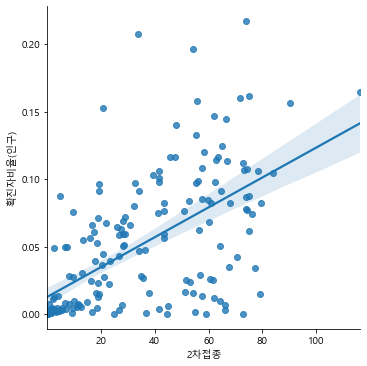

In [73]:
sns.lmplot(x='2차접종', y='확진자비율(인구)', data=df_corona_all_n)
plt.show()

### 인구당 확진자 발생 비율과 백신 접종률 상관관계 그래프 그려보기

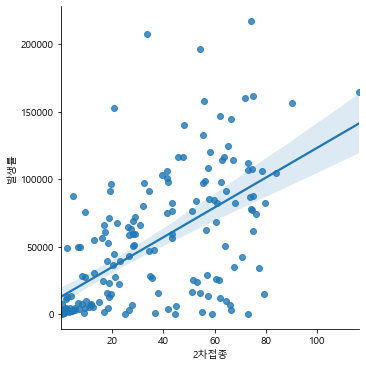

In [74]:
sns.lmplot(x='2차접종', y='발생률', data=df_corona_all_n)
plt.show()

In [75]:
df_corona_all_n.corr()['2차접종']['발생률']

0.5963209756874164

In [76]:
df_corona_all_n.corr()['2차접종']['확진자비율(인구)']

0.5962873390099418

### 01 현재까지의 누적된 데이터로 확인 결과 백신 2차 접종률과 인구당 확진지 비율은 양의 상관관계를 갖는다.
### 02 현재까지의 누적된 데이터로 확인 결과 백신 2차 접종률과 확진자 발생 비율은 양의 상관관계를 갖는다.